<a href="https://colab.research.google.com/github/The-Mandalor-Fett/VA_examen/blob/master/Examen_practico_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importamos las librerias**





In [134]:
# Importamos librerias
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow


# **Nos Da un estimado de una linea**

Producto punto:  801
Producto cruz:  [ -10   10 -100]


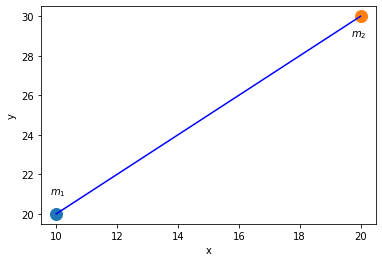

In [135]:
# Creamos un producto punto
m1 = [10, 20, 1]
m2 = [20, 30, 1]
print("Producto punto: ", np.dot(m1, m2))
print("Producto cruz: ", np.cross(m1, m2))
# Graficamos
xs = [m1[0], m2[0]]
ys = [m1[1], m2[1]]

plt.text(xs[0]-.2, ys[0]+1, "$m_1$")
plt.plot(xs[0], ys[0], marker="o", markersize=12)
plt.text(xs[1]-.3, ys[1]-1, "$m_2$")
plt.plot(xs[1], ys[1], marker="o", markersize=12)

plt.plot(xs, ys, color="blue")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


## **Calculamos la recta que pasa entre ambos puntos**

In [136]:
# Recta que pasa en ambos puntos
rectaCruce = np.cross(m1, m2)
a = rectaCruce[0]
b = rectaCruce[1]
c = rectaCruce[2]
print("REcta que cruza por ambos puntos: ", rectaCruce)
print("a,b,c", (a, b, c))
# interseccion de dos rectas
# m l1 x l2 [p,q,r] x = p/r y= q/r


REcta que cruza por ambos puntos:  [ -10   10 -100]
a,b,c (-10, 10, -100)


# **Obtenemos una cruza de las líneas**

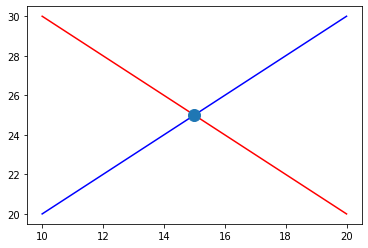

In [137]:
linea1 = [1, -1, 10]
linea2 = [1, 1, -40]

# Rectas
a1 = linea1[0]
b1 = linea1[1]
c1 = linea1[2]
x1 = np.array([10, 20])
y1 = -(a1*x1+c1)/b1
plt.plot(x1, y1, color="blue")

a2 = linea2[0]
b2 = linea2[1]
c2 = linea2[2]
x2 = np.array([10, 20])
y2 = -(a2*x2+c2)/b2
plt.plot(x2, y2, color="red")



mi = np.cross(linea1,linea2)
xi = mi[0]/mi[2]
yi = mi[1]/mi[2]
plt.plot(xi,yi,marker="o",markersize=12)

plt.show()

# **Comenzamos la segmentación**
#  **Ya que esta nos proporciona la segmentación del fondo y permite encerrar ese contorno**
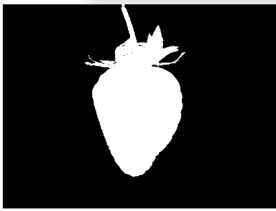
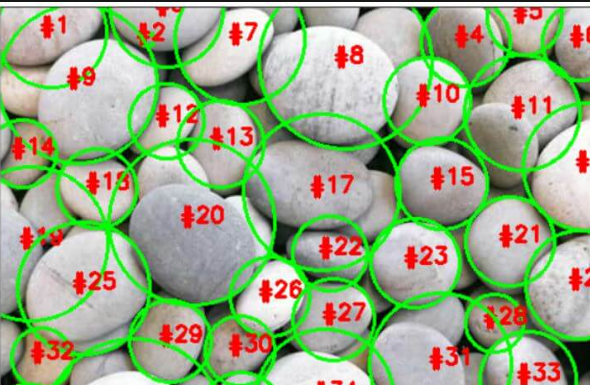

In [138]:
def segmentar(imagenRecibida):
  # Se decidio utilizar otsu ya que nos entrega imagenes como la fresa de arriba
  imagenRecibida = cv2.cvtColor(imagenRecibida, cv2.COLOR_BGR2RGB)
  imagenOriginal = imagenRecibida

# Aplicar filtro suavizado
  imagenBlur = cv2.blur(imagenRecibida,(31,31),0)
  #Convertimos a HSV, Donde S es la pureza de nuestro color
  hsv = cv2.cvtColor(imagenBlur, cv2.COLOR_BGR2HSV)
  # Dividimos los canales
  h, s, v = cv2.split(hsv)
  _,imagenBinarizada = _, threshold = cv2.threshold(s, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
  
  # Para obtener la máscara que nos permita realizar un and y pbtener nuestra imagen sobre puesta en el fondo mas que nada, en sí se puede omitir esto
  # Aunque nos ayuda a segmentar más
  # return threshold
  imagenSegmentada = cv2.bitwise_and(imagenOriginal, imagenOriginal, mask=threshold)
  return imagenBinarizada, imagenSegmentada


# **Creamos una función que nos calcule los contornos**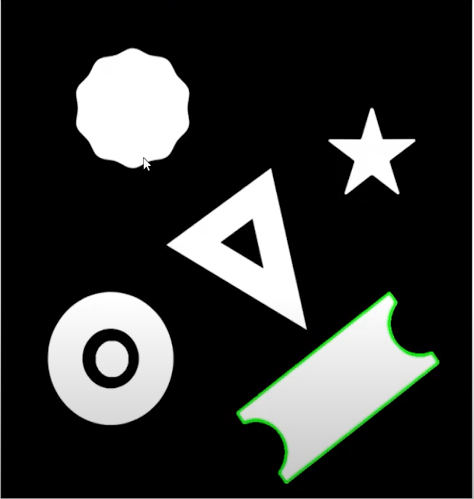

In [139]:
def encontrar_contornos(imagenRecibida,mascara):
  #Creamos nuevas imagenes para los contornos
  
  imagen_copia = imagenRecibida.copy()
  imagenGris = cv2.cvtColor(imagen_copia, cv2.COLOR_RGB2GRAY)
  contorno, jerarquia = cv2.findContours(mascara, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
  # x,y,w,h= cv2.boundingRect(contorno[1])
  # imagenContorno = cv2.rectangle(imagen_copia,(x,y),(x+w,y+h),(0,255,0),3)
  for i,c in enumerate(contorno):
      
  # Usamos la aproximación a la conversión de un poligono de opencv para dibujar lso rectangulos
    contorno_poligono = cv2.approxPolyDP(c, 3, True)
        # Le damos las dimensiones
    x,y,w,h= cv2.boundingRect(contorno[i])
        # Lo dibujamos
    imagenContorno = cv2.rectangle(imagen_copia,(x,y),(x+w,y+h),(0,255,0),3)


  
  return imagenContorno


# **Creamos una función que nos recorte la imagen, esto es para segmentarla más ya que nos piden el tomate 2 al 4, como guardamos las imagenes cortadas las usamos XD**

In [146]:
def linea(imagenRecibida):
  Img=cv2.imread(imagenRecibida)
  filas,columnas= Img.shape[:2]
  # imagenAux= plt.imread(imagenRecibida)
  print("Tamaño de la imagen: ",filas,columnas)
  punto1 = [0,328,1]
  punto2 = [0,334,1]
  xs = [punto1[0], punto2[0]]
  ys = [punto1[1], punto2[1]]

  plt.text(xs[0], ys[0], "$m_1$")
  plt.plot(xs[0], ys[0], marker="o", markersize=12)
  plt.text(xs[1], ys[1], "$m_2$")
  plt.plot(xs[1], ys[1], marker="o", markersize=12)

  plt.plot(xs, ys, color="blue")
  plt.xlabel("x")
  plt.ylabel("y")
  xi = mi[0]/mi[2]
  yi = mi[1]/mi[2]
  plt.plot(xi,yi,marker="o",markersize=12)
  plt.show()

   

# **Cortamos Todo en regiones de interes**

In [141]:
def ROI(imagenRecibida,mascara):
    #Creamos nuevas imagenes para los contornos
  
  imagen_copia = imagenRecibida.copy()
  imagenGris = cv2.cvtColor(imagen_copia, cv2.COLOR_RGB2GRAY)
  contorno, jerarquia = cv2.findContours(mascara, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
  # x,y,w,h= cv2.boundingRect(contorno[1])
  # imagenContorno = cv2.rectangle(imagen_copia,(x,y),(x+w,y+h),(0,255,0),3)
  for i,c in enumerate(contorno):
      
  # Usamos la aproximación a la conversión de un poligono de opencv para dibujar lso rectangulos
    contorno_poligono = cv2.approxPolyDP(c, 3, True)
        # Le damos las dimensiones
    x,y,w,h= cv2.boundingRect(contorno[i])
        # Lo dibujamos
    imagenContorno = cv2.rectangle(imagen_copia,(x,y),(x+w,y+h),(0,255,0),3)
    imagencortada = imagenRecibida[y:y+h, x:x+w]
    imprimiBinarizada(imagencortada)
    cv2.imwrite("ROI{0}.jpg".format(i), imagencortada)

In [142]:
#por alguna razón no muestra la imagen en el main, pero aqui sí
def imprimiBinarizada(imagenBinarizada):
  plt.figure(figsize=(7,7))
  plt.imshow(imagenBinarizada, cmap="gray")
  plt.show()

# **Main**

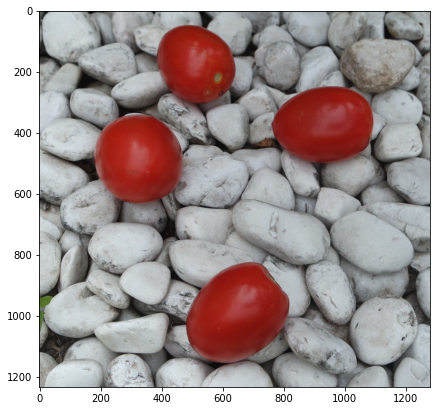

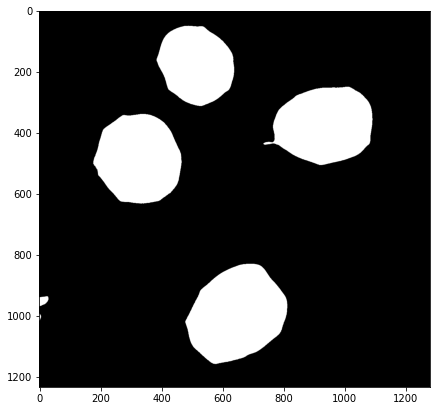

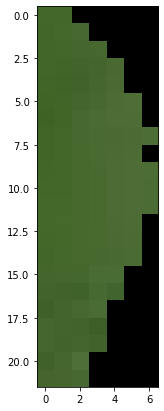

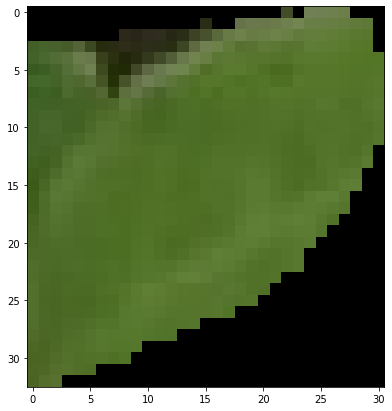

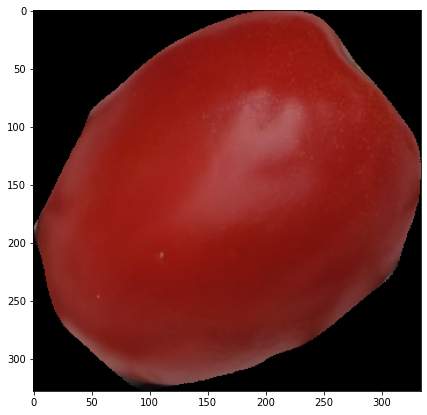

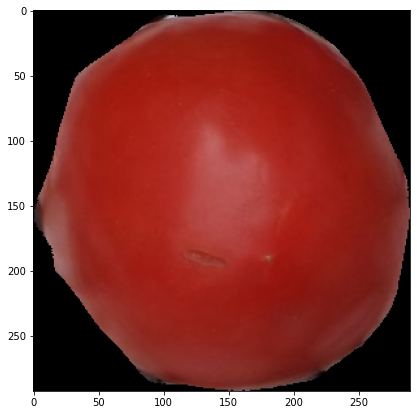

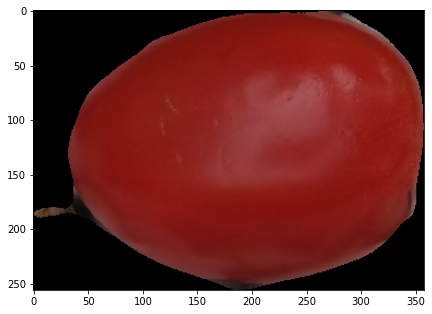

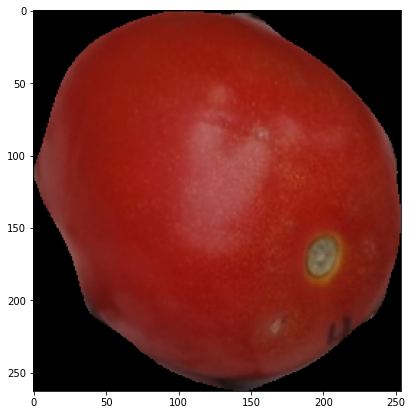

Tamaño de la imagen:  328 334


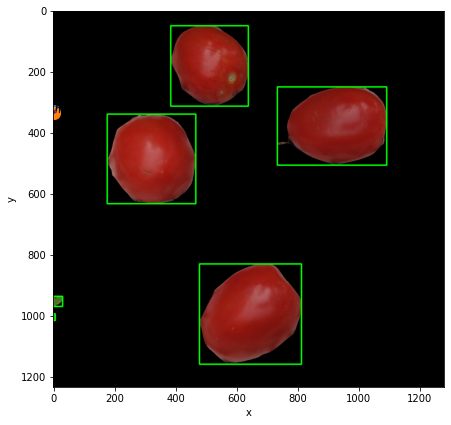

Tamaño de la imagen:  256 358


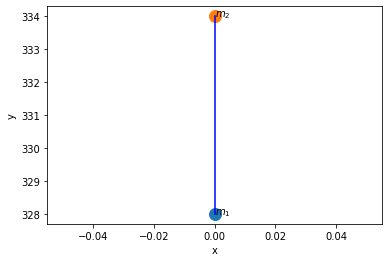

In [147]:
imagenOriginal = cv2.imread("/content/jitomates.jpg")
#Por alguna razón la muestra en BGR así que la convertí
imagen = cv2.cvtColor(imagenOriginal, cv2.COLOR_BGR2RGB)
original = imagen
plt.figure(figsize=(7,7)) # nada más hace más grande la imagen en el plt, si se muestra tal cual no cabe Xd
plt.imshow(original) 

mascara, imagenSegmentada = segmentar(imagenOriginal)

imagenContornos = encontrar_contornos(imagenSegmentada, mascara)


imprimiBinarizada(mascara)
ROI(imagenSegmentada, mascara)

plt.figure(figsize=(7,7))
plt.imshow(imagenSegmentada)
plt.imshow(imagenContornos)
# linea =
ruta2 ="/content/ROI4.jpg"
ruta1 ="/content/ROI2.jpg"
linea(ruta1)
linea(ruta2)

plt.show()
